In [124]:
import numpy as np
import importlib
import ex3_functions
from scipy.io import loadmat

In [125]:
importlib.reload(ex3_functions)

<module 'ex3_functions' from '/home/frolovconst/Dvlpt/prj/Python/PyLearning/ang/Week4/exercise/ex3_functions.py'>

In [126]:
input_layer_size = 400
num_labels = 10

In [127]:
data = loadmat('ex3data1', mat_dtype=True)
X = data['X']
y = data['y']
m = X.shape[0]

In [5]:
rand_indicies = np.random.randint(0, high=m-1, size=(100))
sel = X[rand_indicies]

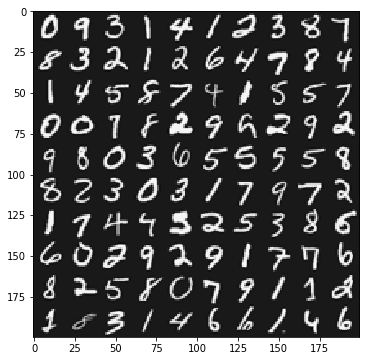

In [6]:
ex3_functions.displayData(np.insert(X,0,1,axis=1), y, indices_to_display=rand_indicies)

In [7]:


#[J grad] = lrCostFunction(theta_t, X_t, y_t, lambda_t);

print('Testing lrCostFunction() with regularization')

theta_t = np.array([-2, -1, 1, 2])
X_t = np.insert(np.arange(1,16).reshape(5,3)/10, 0, 1, axis=1)
y_t =(np.array((1,0,1,0,1)) >= .5).reshape(5,1)
lambda_t = 3
J = ex3_functions.lrCostFunction(X_t, y_t, theta_t, lambda_t)
grad = ex3_functions.lrGradientFunction(X_t, y_t, theta_t, lambda_t)

Testing lrCostFunction() with regularization


In [8]:
print('Cost:');
print(J)
print('Expected cost: 2.534819\n');
print('Gradients:');
print(grad);
print('Expected gradients:\n');
print(' 0.146561\n -0.548558\n 0.724722\n 1.398003\n');

Cost:
2.59000069442
Expected cost: 2.534819

Gradients:
[[-0.1212565 ]
 [-0.60310931]
 [ 0.58476504]
 [ 1.17263939]]
Expected gradients:

 0.146561
 -0.548558
 0.724722
 1.398003



In [113]:
X_d = np.insert(X, 0, 1, axis=1)
lmbd = 0.1

In [114]:
def localCostFoo(theta, y):
#    print(y_d[:5])
    return ex3_functions.lrCostFunction(X_d, y, theta, lmbd)

def localGradFoo(theta, y):
    return ex3_functions.lrGradientFunction(X_d, y, theta, lmbd).flatten()

In [115]:
from scipy import optimize
def oneVsAll(X, y, lmbd, num_labels):
        m = y.size
        n = X.shape[1]
        res_theta = np.zeros(num_labels*n).reshape(num_labels, n)
        for i in range(1, num_labels+1):
#            print('i=%d' %i)
            y_d = (y==i)
            initial_theta = np.zeros(n).reshape(n, 1)
            result = optimize.fmin_cg(localCostFoo, initial_theta, args=(y_d,), fprime=localGradFoo, maxiter=500, full_output=True, gtol=1e-10)
            res_theta[i%10] = result[0]
        return res_theta

In [108]:
theta_rslt = oneVsAll(X_d, y, lmbd, num_labels)

         Current function value: 0.013115
         Iterations: 373
         Function evaluations: 1550
         Gradient evaluations: 1538
         Current function value: 0.050802
         Iterations: 500
         Function evaluations: 1537
         Gradient evaluations: 1537
         Current function value: 0.057602
         Iterations: 500
         Function evaluations: 1536
         Gradient evaluations: 1536
         Current function value: 0.033065
         Iterations: 500
         Function evaluations: 1713
         Gradient evaluations: 1713
         Current function value: 0.054456
         Iterations: 500
         Function evaluations: 1535
         Gradient evaluations: 1535
Optimization terminated successfully.
         Current function value: 0.018256
         Iterations: 489
         Function evaluations: 1856
         Gradient evaluations: 1856
         Current function value: 0.030641
         Iterations: 500
         Function evaluations: 1722
         Gradient evaluat

In [109]:
h_d = ex3_functions.predict(X_d, theta_rslt[1], 10)
h_d[500:1000].sum()

5000

In [89]:
X_p = ex3_functions.predictOneVsAll(X_d, theta_rslt)

In [110]:
X_p = predictOneVsAll(X_d, theta_rslt)

In [111]:
(y==X_p).sum()/y.size

0.93940000000000001

In [139]:
print('Training Set Accuracy: %f' %(np.mean((X_p == y)) * 100))

Training Set Accuracy: 90.340000


## Neural network

In [128]:
input_layer_size = 400
hidden_layer_size = 25
num_labels = 10

In [129]:
data = loadmat('ex3data1', mat_dtype=True)
X = data['X']
y = data['y']

In [130]:
weights = loadmat('ex3weights.mat')
Theta1 = weights['Theta1']
Theta2 = weights['Theta2']

In [131]:
def sgmd(X, theta):
    #theta needs to be N_features X M_nodes
    return 1/(1+np.e**-(X.dot(theta)))

def perdict(X, theta1, theta2):
    IL = np.insert(X, 0, 1, axis=1)
    HL = sgmd(IL, theta1.T)
    HL = np.insert(HL, 0, 1, axis=1)
    OL = sgmd(HL, theta2.T)
    return (np.argmax((OL), axis=1) + 1).reshape(OL.shape[0],1)

In [132]:
p = ex3_functions.predict(X, Theta1, Theta2)

In [141]:
np.mean(p==y)

0.97519999999999996